# Previsioni dopodomani

### Importazione delle librerie principali

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

### Importazione librerie di Machine Learning

Qui importiamo le librerie di scikit-learn necessarie per la creazione dei modelli predittivi.

In [81]:
# Importare le librerie necessarie
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### Caricamento del dataset
Carichiamo il dataset meteorologico contenuto nel file datasetPulito.csv

In [82]:
dataset = pd.read_csv("datasetPulito.csv")

### Creazione delle variabili target
In questa cella creiamo nuove colonne con i valori previsti dopodomani per pressione, precipitazione, temperatura, umidità e vento.  
Usiamo shift(-1) sulle colonne già calcolate per domani, in modo che ogni riga contenga come target i valori del giorno dopo domani.


In [83]:
dataset['Pressione prevista dopodomani'] = dataset['Pressione prevista domani'].shift(-1)
dataset['Precipitazione prevista dopodomani'] = dataset['Precipitazione prevista domani'].shift(-1)
dataset['Temperatura prevista dopodomani'] = dataset['Temperatura prevista domani'].shift(-1)
dataset['Umidità prevista dopodomani'] = dataset['Umidità prevista domani'].shift(-1)
dataset['Vento previsto dopodomani'] = dataset['Vento previsto domani'].shift(-1)

In [84]:
dataset = dataset.dropna()

## Pressione prevista dopodomani

### Definizione delle variabili indipendenti e dipendenti, divisione in training e test set e creazione del modello di regressione lineare
Separiamo le features e il target, dividiamo i dati in training (70%) e test (30%) e addestriamo un modello di Regressione Lineare.  
In seguito facciamo predizioni sul test set, valutiamo le performance tramite R^2 e visualizziamo i risultati confrontando valori reali e predetti con un grafico.

R^2 Score: 0.718329973701885


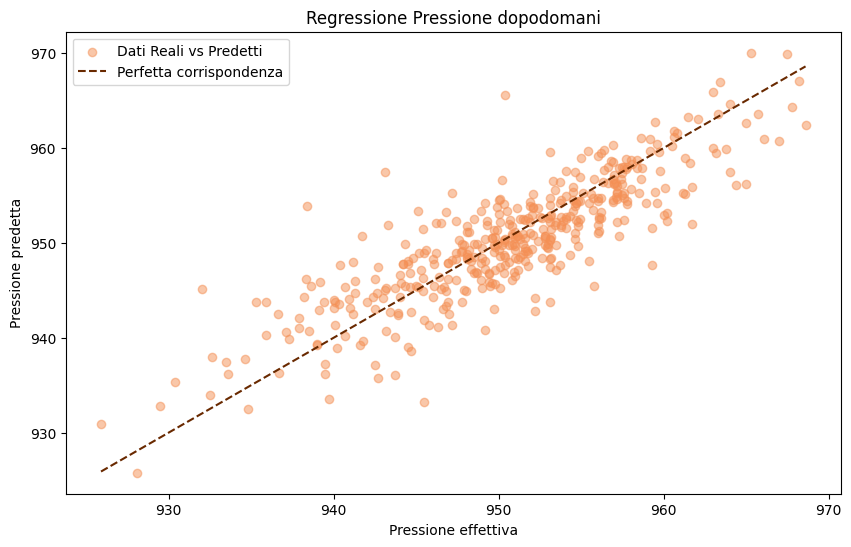

In [85]:
X = dataset.drop(columns = ['DATA', 'Pressione prevista dopodomani'])
y = dataset['Pressione prevista dopodomani'] #target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
modelPress = LinearRegression()
modelPress.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = modelPress.predict(X_test)


print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Pressione effettiva")
plt.ylabel("Pressione predetta")
plt.title("Regressione Pressione dopodomani")
plt.legend()
plt.savefig('regressionePressioneDopodomani.png', dpi = 180, bbox_inches = 'tight')
plt.show()

In [86]:
with open('pressione_prev_dd.pkl', 'wb') as f:
    pickle.dump(modelPress, f) 

## Temperatura prevista dopodomani

### Variabili indipendenti e dipendenti, divisione del dataset, creazione, addestramento e valutazione del modello.
Qui costruiamo un modello per prevedere la temperatura tra due giorni.

In [87]:
dataset = dataset.dropna()

R^2 Score: 0.9605103541172999


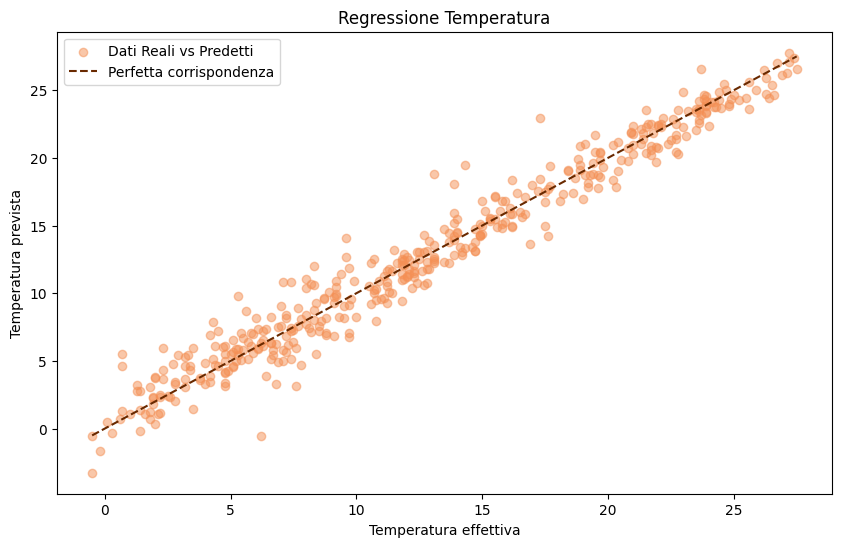

In [88]:
X = dataset.drop(columns = ['DATA', 'Temperatura prevista dopodomani'])
y = dataset['Temperatura prevista dopodomani'] #target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
modelTemp = LinearRegression()
modelTemp.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = modelTemp.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Temperatura effettiva")
plt.ylabel("Temperatura prevista")
plt.title("Regressione Temperatura")
plt.legend()
plt.savefig('regressioneTemperaturaDopodomani.png', dpi = 180, bbox_inches = 'tight')
plt.show()

In [89]:
with open('temperatura_prev_dd.pkl', 'wb') as f:
    pickle.dump(modelTemp, f)

## Previsione umidità dopodomani

### Variabili indipendenti e dipendenti, divisione del dataset, creazione, addestramento e valutazione del modello.
Qui costruiamo un modello per prevedere l'umidità tra due giorni.

R^2 Score: 0.7471714118914468


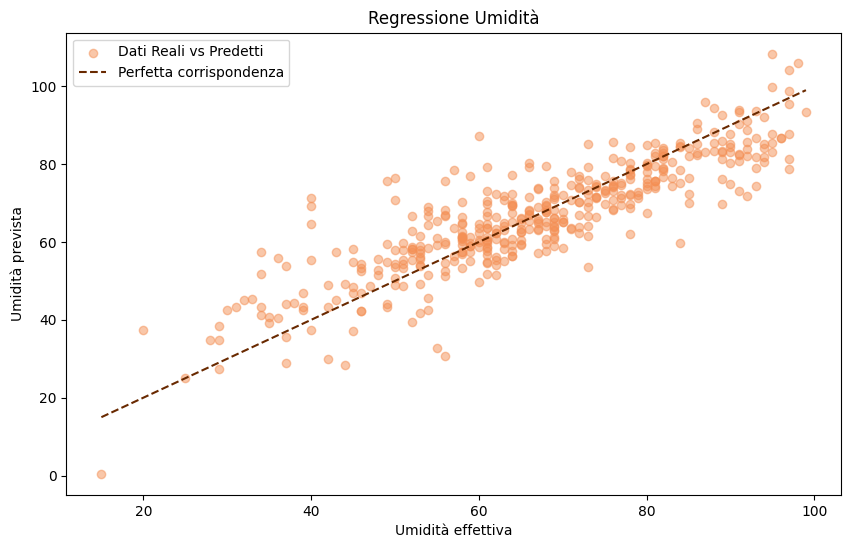

In [90]:
X = dataset.drop(columns = ['DATA', 'Umidità prevista dopodomani'])
y = dataset['Umidità prevista dopodomani'] #target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
modelUmid = LinearRegression()
modelUmid.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = modelUmid.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Umidità effettiva")
plt.ylabel("Umidità prevista")
plt.title("Regressione Umidità")
plt.legend()
plt.savefig('regressioneUmiditàDopodomani.png', dpi = 180, bbox_inches = 'tight')
plt.show()

In [91]:
with open('umidita_prev_dd.pkl', 'wb') as f:
    pickle.dump(modelUmid, f)

## Precipitazioni previste domani

### Variabili indipendenti e dipendenti, divisione del dataset, creazione, addestramento e valutazione del modello.
Qui costruiamo un modello per prevedere le precipitazioni tra due giorni.

R^2 Score: 0.3611099803960771


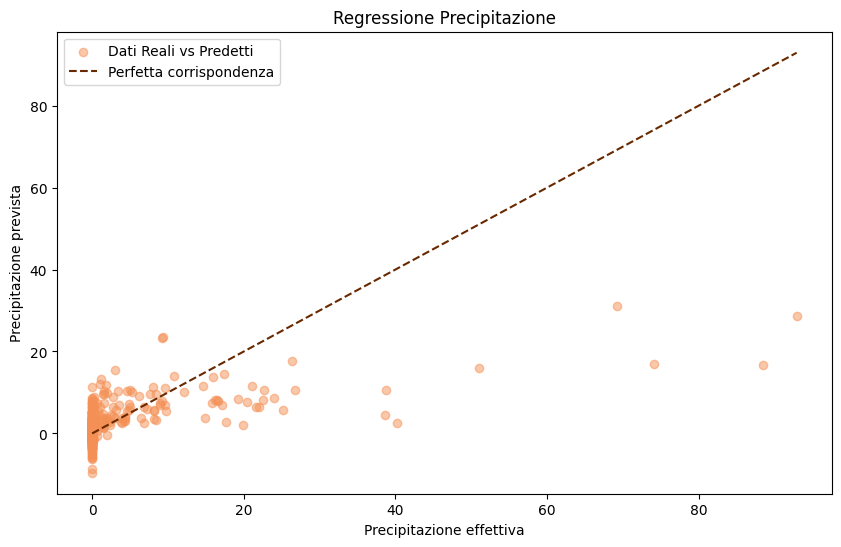

In [92]:
X = dataset.drop(columns = ['DATA', 'Precipitazione prevista dopodomani'])
y = dataset['Precipitazione prevista dopodomani'] #target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
modelPrec = LinearRegression()
modelPrec.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = modelPrec.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Precipitazione effettiva")
plt.ylabel("Precipitazione prevista")
plt.title("Regressione Precipitazione")
plt.legend()
plt.savefig('regressionePrecipitazioneDopodomani.png', dpi = 180, bbox_inches = 'tight')
plt.show()

In [93]:
with open('precip_prev_dd.pkl', 'wb') as f:
    pickle.dump(modelPrec, f)

## Vento previsto dopodomani

### Variabili indipendenti e dipendenti, divisione del dataset, creazione, addestramento e valutazione del modello.
Qui costruiamo un modello per prevedere il vento tra due giorni.

R^2 Score: 0.5794598490196713


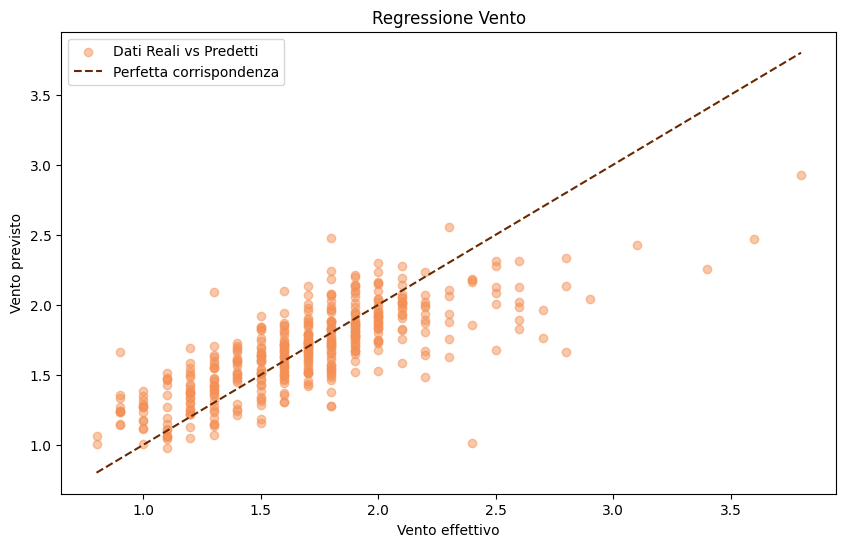

In [76]:
X = dataset.drop(columns = ['DATA', 'Vento previsto dopodomani'])
y = dataset['Vento previsto dopodomani'] #target

# Dividere il dataset in training e test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Creare il modello di regressione lineare
modelVento = LinearRegression()
modelVento.fit(X_train, y_train)

# Fare predizioni sul test set
y_pred = modelVento.predict(X_test)

print("R^2 Score:", r2_score(y_test, y_pred))

# Visualizzare i risultati (grafico)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='#f49055', alpha=0.5, label="Dati Reali vs Predetti")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='#692900', linestyle='--', label="Perfetta corrispondenza")
plt.xlabel("Vento effettivo")
plt.ylabel("Vento previsto")
plt.title("Regressione Vento")
plt.legend()
plt.savefig('regressioneVentoDopodomani.png', dpi = 180, bbox_inches = 'tight')
plt.show()

In [77]:
with open('vento_prev_dd.pkl', 'wb') as f:
    pickle.dump(modelVento, f)

In [78]:
print(dataset.columns)

Index(['Unnamed: 0', 'DATA', 'Umidità massima (%)', 'Umidità media (%)',
       'Umidità minima (%)', 'Precipitazione (mm)', 'Temperatura media (°C)',
       'Temperatura massima (°C)', 'Temperatura minima (°C)',
       'Velocità media (m/s)', 'Velocità raffica (m/s)', 'Valore pressione',
       'Stagione', 'Pressione prevista domani',
       'Precipitazione prevista domani', 'Temperatura prevista domani',
       'Umidità prevista domani', 'Vento previsto domani',
       'Pressione prevista dopodomani', 'Precipitazione prevista dopodomani',
       'Temperatura prevista dopodomani', 'Umidità prevista dopodomani',
       'Vento previsto dopodomani'],
      dtype='object')


### Salvataggio del dataset aggiornato
Salviamo il dataset aggiornato, completo delle nuove colonne target per dopodomani, in un file CSV chiamato datasetPulito_dd.csv, in modo da poterlo utilizzare nel notebook successivo

In [79]:
dataset.to_csv('datasetPulito_dd.csv')